<a href="https://colab.research.google.com/github/manavshah123/Artificial-Intelligence/blob/main/N_Queen_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-1616249778544.927
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


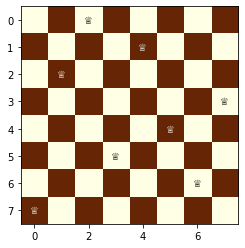

In [5]:

# N Queen Problem
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# N = int(input("enter size of NQueen Board: "))
N = 8


class Queen:
    def __init__(self):
        self.row = -1
        self.column = -1

    def __cmp__(self, other):
        return self.row == other.row and self.column == other.column

    def eq(self, other):
        return self._cmp_(other)

    def __hash__(self):
        return hash(str([self.row, self.column]))


class Node:
    def __init__(self, parent):
        self.NQueen = [Queen() for i in range(N)]
        self.parent = parent

        if parent:
            self.moves = parent.moves + 1

            self.h = parent.h
            for i in range(N):
                self.NQueen[i].row = parent.NQueen[i].row
                self.NQueen[i].column = parent.NQueen[i].column
        else:
            self.moves = 0
            for i in range(N):
                row = random.randint(0, N - 1)
                self.placeQueen(row, i)
            self.h = self.generateHeuristic()

    def placeQueen(self, row, column):
        if row >= N or column >= N:
            return
        if self.NQueen[column].row == row and self.NQueen[column].column == column:
            return
        self.NQueen[column].row = row
        self.NQueen[column].column = column
        self.h = self.generateHeuristic()

    # goal node must have sum = 0, in a same row/column/diagonal other queen -> count++
    def generateHeuristic(self):
        count = 0
        for i in range(N):
            count = count + self.getConflictCount(self.NQueen[i].row, self.NQueen[i].column)
        return count

    def getConflictCount(self, row, column):
        count = 0
        for i in range(N):
            if not (self.NQueen[i].row == row and self.NQueen[i].column == column) and self.NQueen[i].row == row:
                count += 1
            if not (self.NQueen[i].row == row and self.NQueen[i].column == column) and self.NQueen[i].column == column:
                count += 1
            if not (self.NQueen[i].row == row and self.NQueen[i].column == column) and abs(
                    self.NQueen[i].row - row) == abs(self.NQueen[i].column - column):
                count += 1
        return count

    def __repr__(self):
        returnStr = ""
        for i in range(N):
            for j in range(N):
                if self.NQueen[j].row == i:
                    returnStr = returnStr + "1 "
                else:
                    returnStr = returnStr + "0 "
            returnStr = returnStr + '\n'
        returnStr = returnStr + '\n'
        return returnStr

    def score(self):
        return self.h + self.moves

    def __cmp__(self, other):
        if other == None:
            return False
        return self.NQueen == other.NQueen

    def eq(self, other):
        return self._cmp_(other)

    def __hash__(self):
        return hash(str(self.NQueen))

    def __lt__(self, other):
        return self.score() < other.score()

    def nextAllStates(self):
        li = []
        row = self.moves
        for i in range(N):
            if not (self.NQueen[i].row == row and self.NQueen[i].column == i):
                nextNode = Node(self)
                nextNode.placeQueen(row, i)
                li.append(nextNode)
        return li

    def drawQueens(self):  # matplotlib function
        chessboard = np.zeros((N, N))
        print(chessboard)
        chessboard[1::2, 0::2] = 1  # putting black squares in row:1,3,5,7, column:0,2,4,6
        chessboard[0::2, 1::2] = 1  # putting black squares in row 0,2,4,6 column:1,3,5,7
        plt.imshow(chessboard, cmap='YlOrBr')
        # dummy data
        # for _ in range(20):
        # i, j = np.random.randint(0, 8, 2)
        for k in range(N):
            j = self.NQueen[k].row
            i = self.NQueen[k].column
            plt.text(i, j, '♕', va='center', ha='center', color='black' if (i - j) % 2 == 0 else 'white')
        plt.show()
        # for i in range(N):
        #    for j in range(N):


# requires some changes here
# remove goal node
def A_Star(initial_node):
    Open_list = []
    Close_list = []
    Open_list.append(initial_node)
    while len(Open_list) > 0:
        Open_list.sort()
        currentNode = Open_list.pop(0)
        Close_list.append(currentNode)
        if currentNode.h == 0:
            return currentNode
        all_successors = currentNode.nextAllStates()
        for i in all_successors:
            if i in Close_list:
                continue
            Open_list.append(i)


initialNode = Node(None)
start_time = time.time()
result = A_Star(initialNode)
end_time = time.time()
print(end_time-start_time*1000)
result.drawQueens()